#1: Алгоритмы и структуры данных Python

##1: Реализуйте алгоритм Дейкстры

In [18]:
class Node:

    def __init__(self, data, indexloc = None):
        self.data = data
        self.index = indexloc


class Graph:

    @classmethod
    def create_from_nodes(self, nodes):
        return Graph(len(nodes), len(nodes), nodes)


    def __init__(self, row, col, nodes = None):
        # установка матрица смежности
        self.adj_mat = [[0] * col for _ in range(row)]
        self.nodes = nodes
        for i in range(len(self.nodes)):
            self.nodes[i].index = i

    # Связывает node1 с node2
    # Обратите внимание, что ряд - источник, а столбец - назначение
    # Обновлен для поддержки взвешенных ребер (поддержка алгоритма Дейкстры)
    def connect_dir(self, node1, node2, weight = 1):
        node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
        self.adj_mat[node1][node2] = weight

    # Опциональный весовой аргумент для поддержки алгоритма Дейкстры
    def connect(self, node1, node2, weight = 1):
        self.connect_dir(node1, node2, weight)
        self.connect_dir(node2, node1, weight)

    # Получает ряд узла, отметить ненулевые объекты с их узлами в массиве self.nodes
    # Выбирает любые ненулевые элементы, оставляя массив узлов
    # которые являются connections_to (для ориентированного графа)
    # Возвращает значение: массив кортежей (узел, вес)
    def connections_from(self, node):
        node = self.get_index_from_node(node)
        return [(self.nodes[col_num], self.adj_mat[node][col_num]) for col_num in range(len(self.adj_mat[node])) if self.adj_mat[node][col_num] != 0]

    # Проводит матрицу к столбцу узлов
    # Проводит любые ненулевые элементы узлу данного индекса ряда
    # Выбирает только ненулевые элементы
    # Обратите внимание, что для неориентированного графа
    # используется connections_to ИЛИ connections_from
    # Возвращает значение: массив кортежей (узел, вес)
    def connections_to(self, node):
      node = self.get_index_from_node(node)
      column = [row[node] for row in self.adj_mat]
      return [(self.nodes[row_num], column[row_num]) for row_num in range(len(column)) if column[row_num] != 0]


    def print_adj_mat(self):
      for row in self.adj_mat:
          print(row)

    def node(self, index):
      return self.nodes[index]


    def remove_conn(self, node1, node2):
      self.remove_conn_dir(node1, node2)
      self.remove_conn_dir(node2, node1)

    # Убирает связь в направленной манере (nod1 к node2)
    # Может принять номер индекса ИЛИ объект узла
    def remove_conn_dir(self, node1, node2):
      node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
      self.adj_mat[node1][node2] = 0

    # Может пройти от node1 к node2
    def can_traverse_dir(self, node1, node2):
      node1, node2 = self.get_index_from_node(node1), self.get_index_from_node(node2)
      return self.adj_mat[node1][node2] != 0

    def has_conn(self, node1, node2):
      return self.can_traverse_dir(node1, node2) or self.can_traverse_dir(node2, node1)

    def add_node(self,node):
      self.nodes.append(node)
      node.index = len(self.nodes) - 1
      for row in self.adj_mat:
        row.append(0)
      self.adj_mat.append([0] * (len(self.adj_mat) + 1))

    # Получает вес, представленный перемещением от n1
    # к n2. Принимает номера индексов ИЛИ объекты узлов
    def get_weight(self, n1, n2):
        node1, node2 = self.get_index_from_node(n1), self.get_index_from_node(n2)
        return self.adj_mat[node1][node2]

    # Разрешает проводить узлы ИЛИ индексы узлов
    def get_index_from_node(self, node):
        if not isinstance(node, Node) and not isinstance(node, int):
            raise ValueError("node must be an integer or a Node object")
        if isinstance(node, int):
            return node
        else:
            return node.index

In [20]:
a = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")
f = Node("F")

w_graph = Graph.create_from_nodes([a,b,c,d,e,f])

w_graph.connect(a, b, 5)
w_graph.connect(a, c, 10)
w_graph.connect(a, e, 2)
w_graph.connect(b, c, 2)
w_graph.connect(b, d, 4)
w_graph.connect(c, d, 7)
w_graph.connect(c, f, 10)
w_graph.connect(d, e, 3)

w_graph.print_adj_mat()

[0, 5, 10, 0, 2, 0]
[5, 0, 2, 4, 0, 0]
[10, 2, 0, 7, 0, 10]
[0, 4, 7, 0, 3, 0]
[2, 0, 0, 3, 0, 0]
[0, 0, 10, 0, 0, 0]


##2: Напишите программу, которая в последовательности натуральных чисел определяет минимальное число, оканчивающееся на 3.

In [23]:
numbers = [int(x) for x in input("Введите последовательность натуральных чисел через пробел: ").split()]

# Фильтруем числа, оканчивающиеся на 3, и находим минимальное
numbers_ending_with_3 = [num for num in numbers if num % 10 == 3]

if numbers_ending_with_3:
    min_number = min(numbers_ending_with_3)
    print(f"Минимальное число, оканчивающееся на 3: {min_number}")
else:
    print("В последовательности нет чисел, оканчивающихся на 3")

Введите последовательность натуральных чисел через пробел: 4 6 22
В последовательности нет чисел, оканчивающихся на 3


##3: Учитывая целое число n , напишите функцию для вычисления n-го числа Фибоначчи

In [ ]:
def fibonacci_iterative(n): #итеративный метод; сложность - O(n); память - O(1)
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

def fibonacci_binet(n): #формула Бине - дает точный результат только для n < 70 из-за ошибок округления
    phi = (1 + 5**0.5) / 2
    return round(phi**n / 5**0.5)


from functools import lru_cache #мемоизация - оптимизированная рекурсия, сложность O(n) благодаря кешированию результатов
@lru_cache(maxsize=None)
def fibonacci_memo(n):
    if n <= 1:
        return n
    return fibonacci_memo(n-1) + fibonacci_memo(n-2)

def fibonacci_recursive(n): #классическая рекурсия - неэффективно для больших n, сложность O(2^n)
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

#2: Основы SQL

##1: Напишите SQL-запрос, чтобы из таблицы изъять имена, которые начинаются на букву А.



```
SELECT имя  

FROM ваша_таблица  

WHERE имя LIKE 'А%';
```



#3: Анализ больших текстовых данных и текстовый поиск

##1 (возможно, убрали): Разработать API-сервис, принимающий вопросы пользователей и выполняющий обращения к языковым моделям с применением подхода RAG.  

В качестве дополненной информации для RAG предполагается внутренняя Wiki база по тех. поддержке условной организации в виде XML-файлов.


---


*Реализация сервиса:*

- Векторизация данных из XML файлов происходит при запуске сервиса. Файлы берутся из папки `./source_data/`. Можно использовать любую удобную
модель для функции embedding'а.

- Сохранение полученных векторов в БД. Можно использовать любую
БД, подходящую для хранения векторных данных.

- При успешном запуске на стартовой странице должна быть отражена
информация «Сервер запущен. Дата и Время запуска». Если во время
заполнения векторной БД возникли ошибки, то информация «Сервер запущен.Локальные данные не загружены»




- Прием вопроса от пользователя происходит на странице «http://сервер/llm» через GET запрос: Параметр «query» -> Происходит поиск в векторной базе. -> Данные запроса и поиска передаются на генерацию в языковую модель.

Может быть использована любая модель как локальная так и сетевая (Пример: Gigachat API для физических лиц).

- Ответ LLM в формате { “answer”: ответ LLM } отображается на
странице «http://сервер/llm».



---


*Тестирование*

Проект запускается из среды разработки.

Запущенный web-Сервер должен:

- Выполнить векторизацию данных в БД

- Отобразить стартовую страницу

- Принять в адресной строке вопрос пользователя (Пример:
http://сервер/llm?query=вопрос)

- Отображать текстом ответ в формате JSON на странице http://сервер/llm

- Ответ должен соответствовать вопросу и содержать данные из XML-файлов


---


*Усложнение:*

- Использование любых механизмов и подходов по улучшению точности
выдаваемого ответа на основе прилагаемых загруженных данных (Пример:
Системные промты, Перефразирование вопроса, Гибридный поиск,
Переранжирование и т.д.)

*Дополнительные требования:*

- Доп. требования: Использование версии Python 3.9 или выше. Информация в XML файлах на русском языке. Учитывайте это при выборе

моделей

- Обработка исключений: Ваш сервис должен корректно обрабатывать
ошибки, например отсутствие XML файлов в папке, отсутствие доступа к LLM
(если она сетевая). Ошибка должна сохраняться в текстовый файл log-дата.txt
в папке `./logs/`. Один файл с логом на каждый день.

- Документация: Предоставьте документацию для вашего сервиса,
включая описание параметра, возвращаемое значение и любые известные
ограничения, которые в него заложены на языке разметки Markdown

- Допускается использование локальных Open Source моделей и любых,
общедоступных сетевых LLM с бесплатным или частично-бесплатным
доступом. При использовании сетевых моделей, ключи авторизации должны
быть внесены в переменные окружения.


---


*Результат:*

- Файлы с исходным кодом

- Документация по использованию функции

Копируем отсюда: https://github.com/FireStrike1010/open_ai_api_with_knowledge_base/tree/main

##2: Прочитайте текстовый файл, проведите анализ тональности текста и анализ именных сущностей. Результатом выполнения программы должен быть автоматически формируемый отчет с таблицами и графическим представлением данных.

In [ ]:
import spacy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Загрузка модели для NER
nlp = spacy.load('en_core_web_sm')

def analyze_text(file_path):
    # Чтение файла
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Анализ тональности
    blob = TextBlob(text)
    sentiment = blob.sentiment

    # Извлечение именных сущностей
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Подсчет частоты сущностей
    entity_counts = Counter([label for _, label in entities])

    return {
        'text': text,
        'sentiment': sentiment,
        'entities': entities,
        'entity_counts': entity_counts
    }

def generate_report(data, output_file):
    # Создаем DataFrame для сущностей
    entities_df = pd.DataFrame(data['entities'], columns=['Entity', 'Type'])

    # Преобразуем Counter в DataFrame для построения графика
    entity_counts_df = pd.DataFrame.from_dict(data['entity_counts'], orient='index').reset_index()
    entity_counts_df.columns = ['Entity Type', 'Count']

    # Создаем графики
    plt.figure(figsize=(12, 6))

    # График распределения типов сущностей
    plt.subplot(1, 2, 1)
    entity_counts_df.plot(x='Entity Type', y='Count', kind='bar', legend=False)
    plt.title('Распределение типов именных сущностей')
    plt.xlabel('Тип сущности')
    plt.ylabel('Количество')

    # График тональности
    plt.subplot(1, 2, 2)
    plt.bar(['Polarity', 'Subjectivity'], [data['sentiment'].polarity, data['sentiment'].subjectivity])
    plt.title('Анализ тональности текста')
    plt.ylim(-1, 1)

    # Сохраняем графики
    plt.tight_layout()
    plt.savefig('analysis_plots.png')

    # Генерируем HTML-отчет
    html = f"""
    <html>
        <head>
            <title>Анализ текста</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; }}
                h1 {{ color: #2e6c80; }}
                table {{ border-collapse: collapse; width: 100%; }}
                th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
                th {{ background-color: #f2f2f2; }}
                img {{ max-width: 100%; height: auto; }}
            </style>
        </head>
        <body>
            <h1>Анализ текста</h1>

            <h2>Общая информация</h2>
            <p>Длина текста: {len(data['text'])} символов</p>
            <p>Полярность: {data['sentiment'].polarity:.2f} (от -1 до 1)</p>
            <p>Субъективность: {data['sentiment'].subjectivity:.2f} (от 0 до 1)</p>

            <h2>Именные сущности (всего {len(data['entities'])}</h2>
            {entities_df.to_html(index=False)}

            <h2>Статистика по типам сущностей</h2>
            {entity_counts_df.to_html(index=False)}

            <h2>Визуализация данных</h2>
            <img src="analysis_plots.png" alt="Графики анализа">
        </body>
    </html>
    """

    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(html)

# Пример использования
if __name__ == "__main__":
    input_file = '/content/example.txt'  # Замените на ваш файл
    output_file = 'text_analysis_report.html'

    analysis_data = analyze_text(input_file)
    generate_report(analysis_data, output_file)
    print(f"Отчет сохранен в файл: {output_file}")

##3: Прочитайте текстовый файл, напишите программу прогнозирующую количество реакций на публикацию текста в социальной сети.

У нас был такой курсач в 3 семестре: https://colab.research.google.com/drive/115cGa7BWsd2p2GHlZBEsLw0hJvjTdFfH?usp=sharing

XLSX-файл с данными брать тут: https://1drv.ms/x/c/af7b7be8c145f43b/ETv0RcHoe3sggK9UEwMAAAABXVhJef6PHFc8vvJNpdmCBA?e=1cd7SD

##4: Прочитайте текстовый файл. Проведите векторизацию текста используя различные методы, в том числе предобученные модели, word2vec, Skip-Gram.

In [2]:
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sentence_transformers import SentenceTransformer
import spacy
from collections import defaultdict

# 1. Чтение текстового файла и предварительная обработка
def read_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Токенизация с помощью spaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    tokenized_sentences = [[token.text.lower() for token in sent if token.is_alpha]
                         for sent in doc.sents]

    return text, sentences, tokenized_sentences

# 2. Методы векторизации
class TextVectorizer:
    def __init__(self):
        # Загрузка предобученных моделей
        self.glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False)
        self.sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        self.nlp = spacy.load('en_core_web_md')

    # Метод Bag-of-Words
    def bow_vectorization(self, sentences):
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(sentences)
        return X.toarray()

    # Метод TF-IDF
    def tfidf_vectorization(self, sentences):
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(sentences)
        return X.toarray()

    # Word2Vec (обучение на своем корпусе)
    def word2vec_vectorization(self, tokenized_sentences, size=100, window=5, sg=0):
        model = Word2Vec(tokenized_sentences, vector_size=size, window=window, sg=sg, min_count=1)
        return model

    # Skip-Gram (вариант Word2Vec)
    def skipgram_vectorization(self, tokenized_sentences, size=100, window=5):
        return self.word2vec_vectorization(tokenized_sentences, size=size, window=window, sg=1)

    # GloVe (предобученные векторы)
    def glove_vectorization(self, tokenized_sentences):
        sentence_vectors = []
        for sentence in tokenized_sentences:
            vectors = [self.glove_model[word] for word in sentence if word in self.glove_model]
            if vectors:
                sentence_vectors.append(np.mean(vectors, axis=0))
            else:
                sentence_vectors.append(np.zeros(self.glove_model.vector_size))
        return np.array(sentence_vectors)

    # FastText (предобученные векторы)
    def fasttext_vectorization(self, tokenized_sentences):
        # Аналогично GloVe, но с другой моделью
        pass

    # Контекстные эмбеддинги (Sentence-BERT)
    def sbert_vectorization(self, sentences):
        return self.sbert_model.encode(sentences)

    # spaCy векторизация
    def spacy_vectorization(self, sentences):
        return np.array([self.nlp(sent).vector for sent in sentences])

# 3. Пример использования
if __name__ == "__main__":
    file_path = 'example.txt'
    text, sentences, tokenized_sentences = read_and_preprocess(file_path)

    vectorizer = TextVectorizer()

    # Применяем различные методы векторизации
    methods = {
        'BoW': vectorizer.bow_vectorization,
        'TF-IDF': vectorizer.tfidf_vectorization,
        'Word2Vec': lambda s: vectorizer.word2vec_vectorization(tokenized_sentences),
        'Skip-Gram': lambda s: vectorizer.skipgram_vectorization(tokenized_sentences),
        'GloVe': lambda s: vectorizer.glove_vectorization(tokenized_sentences),
        'Sentence-BERT': vectorizer.sbert_vectorization,
        'spaCy': vectorizer.spacy_vectorization
    }

    results = {}
    for name, method in methods.items():
        try:
            results[name] = method(sentences)
            print(f"{name} векторизация выполнена. Размерность: {results[name].shape}")
        except Exception as e:
            print(f"Ошибка в {name}: {str(e)}")

    # Пример доступа к результатам
    print("\nПример вектора (первые 10 элементов):")
    for name, vectors in results.items():
        if isinstance(vectors, np.ndarray):
            print(f"{name}: {vectors[0][:10]}")
        elif isinstance(vectors, Word2Vec):
            print(f"{name}: Модель Word2Vec обучена. Пример вектора для 'the': {vectors.wv['the'][:10]}")

ImportError: cannot import name 'is_torch_npu_available' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

##5: Прочитайте текстовый файл. Используйте его как контекст для создания диалоговой системы. Создайте диалоговые модели, используя предобученные LLM. Сформируйте отчет о результатах работы различных моделей (сравнение ответов на одни и теже вопросы). Сделайте вывод об области применения предобученных LLM.

In [36]:
pip install torch==2.0.1 transformers==4.30.2 pandas==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import time
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import pandas as pd

def read_file(file_path):
    """Чтение текстового файла и возвращение его содержимого в виде строки."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def initialize_models():
    """Инициализация нескольких предобученных моделей для сравнения."""
    models = {
        "GPT-2": "gpt2",
        "DistilGPT-2": "distilgpt2"
    }

    initialized_models = {}
    for name, model_path in models.items():
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_path)
            model = AutoModelForCausalLM.from_pretrained(model_path)
            initialized_models[name] = pipeline(
                'text-generation',
                model=model,
                tokenizer=tokenizer,
                device=-1  # Используем CPU (для GPU укажите 0 или другой индекс)
            )
            print(f"Модель {name} успешно загружена")
        except Exception as e:
            print(f"Ошибка при загрузке модели {name}: {str(e)}")

    return initialized_models

def generate_responses(context, questions, models):
    """Генерация ответов на вопросы с использованием разных моделей."""
    results = []

    for question in questions:
        prompt = f"Контекст: {context}\n\nВопрос: {question}\nОтвет:"

        for model_name, model in models.items():
            try:
                start_time = time.time()
                response = model(
                    prompt,
                    max_length=150,
                    num_return_sequences=1,
                    truncation=True,
                    do_sample=True,
                    top_k=50,
                    top_p=0.95
                )
                generation_time = time.time() - start_time

                answer = response[0]['generated_text'].replace(prompt, "").strip()

                results.append({
                    "Модель": model_name,
                    "Вопрос": question,
                    "Ответ": answer,
                    "Время генерации (сек)": round(generation_time, 2)
                })
            except Exception as e:
                print(f"Ошибка при генерации ответа моделью {model_name}: {str(e)}")
                results.append({
                    "Модель": model_name,
                    "Вопрос": question,
                    "Ответ": f"Ошибка: {str(e)}",
                    "Время генерации (сек)": 0
                })

    return pd.DataFrame(results)

def save_report(df, output_file):
    """Сохранение результатов сравнения в файл."""
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("Отчет сравнения моделей LLM\n\n")
        f.write(df.to_markdown(index=False))

def main():
    # Конфигурация
    input_file = "context.txt"  # Файл с контекстом
    output_file = "report.md"   # Файл для отчета
    questions = [               # Вопросы для тестирования
        "Какая основная тема этого текста?",
        "Какие ключевые моменты можно выделить?",
        "Какие выводы можно сделать из этого текста?"
    ]

    try:
        # Чтение контекста
        context = read_file(input_file)
        print(f"Прочитан контекст длиной {len(context)} символов")

        # Инициализация моделей
        models = initialize_models()
        if not models:
            raise ValueError("Не удалось загрузить ни одной модели")
        print(f"Инициализировано {len(models)} моделей")

        # Генерация ответов
        results_df = generate_responses(context, questions, models)

        # Сохранение отчета
        save_report(results_df, output_file)
        print(f"Отчет сохранен в {output_file}")

        # Вывод результатов в консоль
        print("\nРезультаты:")
        print(results_df.to_markdown(index=False))

    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")

if __name__ == "__main__":
    main()

Произошла ошибка: [Errno 2] No such file or directory: 'context.txt'


# 4: Системы программирования Python



##1: Чтение текстового файла размером более 7 Гб и формирование единого массива данных. Время работы не должно превышать 3 минуты.

In [ ]:
def read_large_file(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:  # Чтение файла построчно (ленивое)
            # Обработка строки (например, удаление пробелов)
            processed_line = line.strip()
            if processed_line:  # Если строка не пустая
                data.append(processed_line)
    return data

# Пример использования
file_path = 'your_large_file.txt'
data_array = read_large_file(file_path)
print(f"Прочитано {len(data_array)} строк.")

Построчное чтение: Используется итерация по файлу (for line in file), что позволяет не загружать весь файл в память.

Буферизация: Python по умолчанию использует буферизацию при чтении файла.

Минимальная обработка: Лучше избегать сложных операций внутри цикла.

In [1]:
#многопоточность
from concurrent.futures import ThreadPoolExecutor

def read_file_chunk(start, end, file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        file.seek(start)
        chunk = file.read(end - start)
    return chunk.splitlines()

def parallel_read(file_path, chunk_size=1024*1024*64):  # 64MB чанки
    from os import path
    file_size = path.getsize(file_path)
    chunks = [(i, min(i + chunk_size, file_size)) for i in range(0, file_size, chunk_size)]

    with ThreadPoolExecutor() as executor:
        results = list(executor.map(lambda x: read_file_chunk(*x, file_path), chunks))
    return [line for chunk in results for line in chunk]

In [ ]:
#юзаем numpy для числовых данных
import numpy as np
data = np.loadtxt(file_path, dtype=np.float32)  # Для чисел

In [ ]:
#и pandas для структурированных
import pandas as pd
chunks = pd.read_csv(file_path, chunksize=100000)
data = pd.concat(chunks)

##2: Напиши функцию, которая вернет пересечение двух массивов на языке Python, например, X = [1, 5, 9, 0] и Y = [3, 0, 2, 9]. Функция должна учитывать, что пользователь может вводить данные любого типа.

In [2]:
def find_intersection(arr1, arr2): #для хешируемых типов данных: числа, строки, кортежи
    """Возвращает пересечение двух массивов с учётом порядка первого массива."""
    # Преобразуем второй массив в множество для быстрого поиска O(1)
    set_arr2 = set(arr2)
    # Проходим по первому массиву и собираем элементы, которые есть во втором
    intersection = [x for x in arr1 if x in set_arr2]
    return intersection

# Пример использования
X = [1, 5, 9, 0]
Y = [3, 0, 2, 9]
result = find_intersection(X, Y)
print(result)  # Вывод: [9, 0]

[9, 0]


In [3]:
print(list(set(X) & set(Y))) #можно использовать, если порядок не важен

[0, 9]


Особенности:
Поддержка любых типов данных — работает с числами, строками, кортежами и другими хешируемыми типами.

Сохранение порядка — элементы возвращаются в том порядке, в котором они встречаются в первом списке (arr1).

Эффективность — преобразование arr2 в множество (set) даёт среднюю сложность O(1) для проверки вхождения, общая сложность — O(n + m).

In [ ]:
def find_intersection_unhashable(arr1, arr2): #для нехешируемых: списки, словари и т. д.
    """Альтернатива для случаев, когда arr2 содержит нехешируемые элементы."""
    intersection = []
    for x in arr1:
        if x in arr2:  # Поиск без преобразования в set (медленнее, O(n)), работает за O(n*m)
            intersection.append(x)
    return intersection

# Пример с нехешируемыми типами
X = [[1, 2], [3, 4]]
Y = [[3, 4], [5, 6]]
print(find_intersection_unhashable(X, Y))  # Вывод: [[3, 4]]

##3: Василий считает, что когда текст пишут в скобках (как вот тут, например), его читать не нужно. Вот и надумал он существенно укоротить время чтения, написав функцию, которая будет удалять все, что расположено внутри скобок. Помогите ленивому Васе разработать функцию, которая будет удалять все, что внутри скобок и сами эти скобки, возвращая очищенный текст (скобки могут быть вложенными).

In [ ]:
def remove_text_in_brackets(text):
    result = []
    stack = []

    for char in text:
        if char == '(':
            stack.append(char)  # Начало скобки
        elif char == ')' and stack:
            stack.pop()  # Конец скобки
        elif not stack:
            result.append(char)  # Добавляем символ, если не внутри скобок

    return ''.join(result)

# Пример использования
text = "Это (пример (вложенных) скобок) и еще (одни) скобки."
clean_text = remove_text_in_brackets(text)
print(clean_text)  # Вывод: "Это  и еще  скобки."

Стек (stack) отслеживает, находимся ли мы внутри скобок.

При встрече "(" добавляем в стек.

При встрече ")" удаляем из стека (если скобка была открыта).

Символы добавляются в результат только если стек пуст (т.е. мы не внутри скобок).

##4: Напишите программу для вычисления и вывода суммы квадратов двузначных чисел, которые делятся на 77 без остатка. При решении задачи используйте функции filter(), map() и sum().
На 77 должно делиться исходное двузначное число, а не его квадрат. Не забывайте про отрицательные двузначные числа.

In [5]:
numbers = [77, 293, 28, 242, 213, 285, 71, 286, 144, 276, 61, 298, 280, 214,
156, 227, 228, 51, -4, 202, 58, 99, 270, 219, 94, 253, 53, 235, 9, 158, 49, 183, 166,
205, 183, 266, 180, 6, 279, 200, 208, 231, 178, 201, 260, -35, 152, 115, 79, 284, 181,
92, 286, 98, 271, 259, 258, 196, -8, 43, 2, 128, 143, 43, 297, 229, 60, 254, -9, 5, 187,
220, -8, 111, 285, 5, 263, 187, 192, -9, 268, -9, 23, 71, 135, 7, -161, 65, 135, 29, 148,
242, 33, 35, 211, 5, 161, 46, 159, 23, 169, 23, 172, 184, -7, 228, 129, 274, 73, 197,
272, 54, 278, 26, 280, 13, 171, 2, 79, -2, 183, 10, 236, 276, 4, 29, -10, 41, 269, 94,
279, 129, 39, 92, -63, 263, 219, 57, 18, 236, 291, 234, 10, 250, 0, 64, 172, 216, 30,
15, 229, 205, 123, -105]

# 1. Фильтруем двузначные числа, делящиеся на 77
filtered_numbers = filter(lambda x: (10 <= abs(x) <= 99) and (x % 77 == 0), numbers)

# 2. Возводим их в квадрат
squared_numbers = map(lambda x: x ** 2, filtered_numbers)

# 3. Суммируем квадраты
result = sum(squared_numbers)

print(result)

5929


filter(lambda x: (10 <= abs(x) <= 99) and (x % 77 == 0), numbers)
*   10 <= abs(x) <= 99 — проверяет, что число двузначное (учитывая отрицательные).
*   x % 77 == 0 — проверяет делимость на 77.

map(lambda x: x ** 2, filtered_numbers) - Возводит каждое отфильтрованное число в квадрат.

sum(squared_numbers) - Суммирует все квадраты.

##5: Электронные часы показывают время в формате h:mm:ss, то есть сначала записывается количество часов, потом обязательно двузначное количество минут, затем обязательно двузначное количество секунд.
Количество минут и секунд при необходимости дополняются до двузначного
числа нулями. С начала суток прошло n секунд. Выведите, что покажут часы.

Входные данные: Вводится целое число n.

Выходные данные: Выведите ответ на задачу, соблюдая требуемый формат.

In [9]:
n = int(input())

hours = n // 3600
remaining_seconds = n % 3600
minutes = remaining_seconds // 60
seconds = remaining_seconds % 60

# Форматируем вывод, чтобы минуты и секунды были двузначными
print(f"{hours}:{minutes:02d}:{seconds:02d}")

90562
25:09:22


##6: Определите класс train с двумя атрибутами: type и speed. Затем создайте экземпляр и верните speed.

In [10]:
class Train:
    def __init__(self, type, speed):
        self.type = type  # Тип поезда (например, "пассажирский", "грузовой")
        self.speed = speed  # Скорость поезда (число)

# Создаем экземпляр класса Train
my_train = Train(type="грузовой", speed=120)

# Возвращаем скорость поезда
print(my_train.speed)

120


##7: Преобразуйте следующий цикл for в генератор списков (list comprehension):

```
a = [1,2,3,4,5]
a2 = []

for i in a:
  a2.append(i + 1)
print(a2)
```





In [11]:
a = [1, 2, 3, 4, 5]
a2 = [i + 1 for i in a]
print(a2)

[2, 3, 4, 5, 6]


##8: Напишите программу, которая проверить наличия заданной пользователем даты во фрейме данных и событие, ему соответствующее. Дата подается в формате '2021-01-18'. В случае если во фрейме данных даты нет, необходимо вывести оповещение и ближайшую дату.



```
data = {'Date': ['2021-01-18', '2021-01-20', '2021-01-23', '2021-01-25'],
        'event': ['fail', 'correct', 'fail', 'fail']}
```



In [13]:
import pandas as pd
from datetime import datetime

# Создаем DataFrame
data = {'Date': ['2021-01-18', '2021-01-20', '2021-01-23', '2021-01-25'],
        'event': ['fail', 'correct', 'fail', 'fail']}
df = pd.DataFrame(data)

# Преобразуем столбец 'Date' в datetime для корректного сравнения
df['Date'] = pd.to_datetime(df['Date'])

# Запрашиваем дату у пользователя
try:
    user_date = pd.to_datetime(input("Введите дату в формате 'YYYY-MM-DD': "))
except ValueError:
    print("Некорректный формат даты!")

user_date = pd.to_datetime(user_date)

# Проверяем наличие даты в DataFrame
if user_date in df['Date'].values:
    event = df.loc[df['Date'] == user_date, 'event'].values[0]
    print(f"Дата {user_date.strftime('%Y-%m-%d')} найдена. Событие: {event}")
else:
    print(f"Дата {user_date.strftime('%Y-%m-%d')} не найдена.")

    # Находим ближайшую дату
    df['diff'] = abs(df['Date'] - user_date)
    nearest_date = df.loc[df['diff'].idxmin(), 'Date']
    nearest_event = df.loc[df['diff'].idxmin(), 'event']

    print(f"Ближайшая дата: {nearest_date.strftime('%Y-%m-%d')}. Событие: {nearest_event}")

Введите дату в формате 'YYYY-MM-DD': 2021-01-21
Дата 2021-01-21 не найдена.
Ближайшая дата: 2021-01-20. Событие: correct


Создание DataFrame:
*   Исходные данные преобразуются в DataFrame с колонками Date и event.

Преобразование дат:
*   Колонка Date преобразуется в формат datetime для корректной работы с датами.

Ввод даты пользователем:
*   Пользователь вводит дату, которая также преобразуется в datetime.

Проверка наличия даты:
*   Если дата есть в DataFrame, выводится соответствующее событие.
*   Если даты нет, вычисляется ближайшая дата с помощью разницы между датами `(abs(df['Date'] - user_date)).`

Вывод результата:
*   Для найденной даты выводится событие.
*   Для отсутствующей даты выводится ближайшая дата и её событие.


##9: Напишите программу, которая принимает на вход описание одного объекта в формате JSON и выводит все пары ключ-значение этого объекта. На вход программе подается корректное описание одного объекта в формате JSON.
Программа должна вывести все пары ключ-значение введенного объекта, разделяя ключ и значение двоеточием, каждую на отдельной строке.
Если значением ключа является список, то все его элементы должны быть
выведены через запятую. Пары ключ-значение при выводе должны располагаться в своем исходном порядке. Для считывания произвольного числа строк используйте потоковый ввод sys.stdin.

Для использования stdin локально создайте файл .py и запустите его используя командную строку (cmd) или PowerShell. После чего вставьте туда тестовые данные


```
{
    "name": "John",
    "age": 30,
    "hobbies": ["reading", "swimming", "coding"],
    "address": {
        "street": "123 Main St",
        "city": "New York"
    }
}
```
Вывод будет произведен после выхода из процесса (Ctrl + Z) + Enter - Windows | Ctrl + D - UNIX.



In [17]:
import json
import sys

def process_value(value):
    if isinstance(value, list):
        return ', '.join(map(str, value))
    return str(value)

def print_key_value_pairs(json_data):
    for key, value in json_data.items():
        processed_value = process_value(value)
        print(f"{key}: {processed_value}")

def main():
    # Считываем весь ввод из stdin
    input_data = ''.join(sys.stdin.readlines())

    try:
        # Парсим JSON
        json_obj = json.loads(input_data)

        # Проверяем, что это объект (словарь)
        if isinstance(json_obj, dict):
            print_key_value_pairs(json_obj)
        else:
            print("Входные данные должны представлять JSON-объект (словарь)")
    except json.JSONDecodeError:
        print("Ошибка: некорректный JSON")

if __name__ == "__main__":
    main()



Ошибка: некорректный JSON


#5: Машинное обучение и методы обработки данных

##1: EDA и Feature Engineering

Считайте csv-файл. Проведите разведочный анализ данных. Результаты представьте в виде:

- фрейма данных и текстового описания. Текст и фрейм должны генерироваться по итогу выполнения кода.

- Графического сопровождения, логичного для набора данных (не менее 3, исходя из данных)

<ipython-input-3-e99f596e1515>:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='total_sales', data=df, estimator=sum, ci=None)



Разведочный анализ данных:

1. Общая информация:
   - Всего записей: 10
   - Период данных: с 2023-01-01 по 2023-01-10
   - Количество уникальных продуктов: 6
   - Категории продуктов: Electronics, Furniture, Clothing

2. Статистика по числовым столбцам:
   - Цена: средняя 567.20, мин 30, макс 1200
   - Количество: среднее 5.00, мин 1, макс 12
   - Общие продажи: 18268.00

3. Распределение по категориям:
   - Электроника: 5 продаж
   - Мебель: 2 продаж
   - Одежда: 3 продаж

4. Регионы:
   - Север: 3 продаж
   - Юг: 3 продаж
   - Восток: 2 продаж
   - Запад: 2 продаж


Пример данных (первые 5 строк):


,date,product,category,price,quantity,region,total_sales
0,2023-01-01,A,Electronics,999,5,North,4995
1,2023-01-02,B,Furniture,450,2,South,900
2,2023-01-03,C,Electronics,799,3,East,2397
3,2023-01-04,A,Electronics,899,4,West,3596
4,2023-01-05,D,Clothing,50,10,North,500


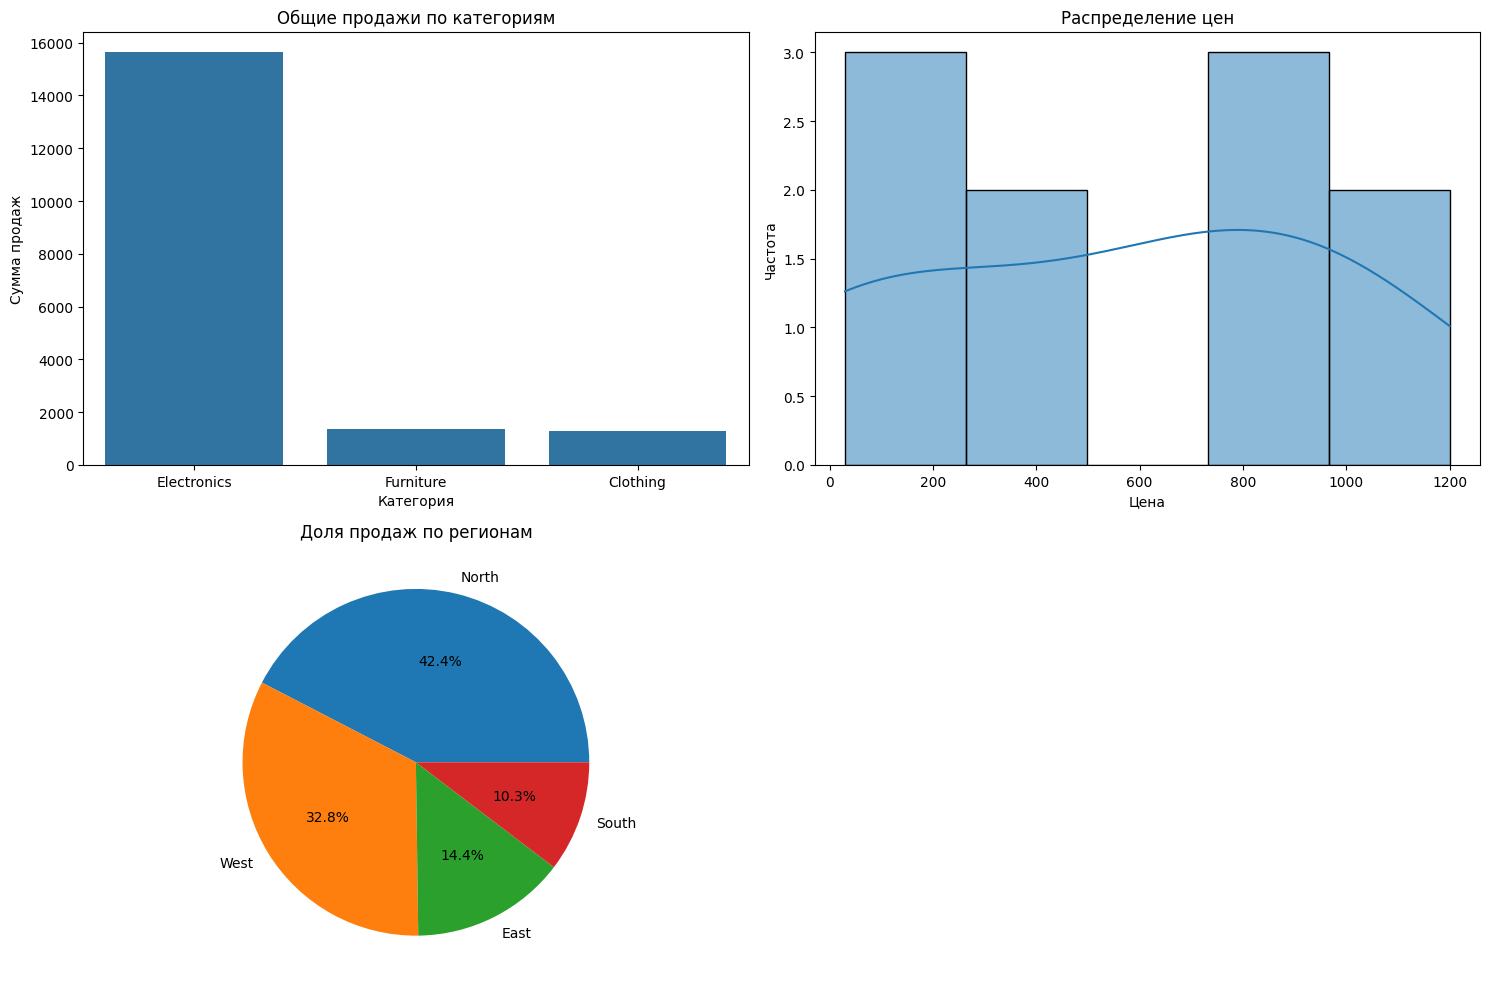

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import numpy as np

# Для примера создадим искусственный CSV-файл
data = """
date,product,category,price,quantity,region
2023-01-01,A,Electronics,999,5,North
2023-01-02,B,Furniture,450,2,South
2023-01-03,C,Electronics,799,3,East
2023-01-04,A,Electronics,899,4,West
2023-01-05,D,Clothing,50,10,North
2023-01-06,B,Furniture,450,1,South
2023-01-07,E,Clothing,30,8,East
2023-01-08,F,Electronics,1200,2,West
2023-01-09,C,Electronics,750,3,North
2023-01-10,D,Clothing,45,12,South
"""
csv_file = StringIO(data)

# 1. Чтение CSV-файла
df = pd.read_csv(csv_file)
df['date'] = pd.to_datetime(df['date'])
df['total_sales'] = df['price'] * df['quantity']

# 2. Разведочный анализ данных
description = f"""
Разведочный анализ данных:

1. Общая информация:
   - Всего записей: {len(df)}
   - Период данных: с {df['date'].min().date()} по {df['date'].max().date()}
   - Количество уникальных продуктов: {df['product'].nunique()}
   - Категории продуктов: {', '.join(df['category'].unique())}

2. Статистика по числовым столбцам:
   - Цена: средняя {df['price'].mean():.2f}, мин {df['price'].min()}, макс {df['price'].max()}
   - Количество: среднее {df['quantity'].mean():.2f}, мин {df['quantity'].min()}, макс {df['quantity'].max()}
   - Общие продажи: {df['total_sales'].sum():.2f}

3. Распределение по категориям:
   - Электроника: {len(df[df['category'] == 'Electronics'])} продаж
   - Мебель: {len(df[df['category'] == 'Furniture'])} продаж
   - Одежда: {len(df[df['category'] == 'Clothing'])} продаж

4. Регионы:
   - Север: {len(df[df['region'] == 'North'])} продаж
   - Юг: {len(df[df['region'] == 'South'])} продаж
   - Восток: {len(df[df['region'] == 'East'])} продаж
   - Запад: {len(df[df['region'] == 'West'])} продаж
"""

# 3. Создание графиков
plt.figure(figsize=(15, 10))

# График 1: Продажи по категориям
plt.subplot(2, 2, 1)
sns.barplot(x='category', y='total_sales', data=df, estimator=sum, ci=None)
plt.title('Общие продажи по категориям')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')

# График 2: Распределение цен
plt.subplot(2, 2, 2)
sns.histplot(df['price'], bins=5, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')

# График 3: Продажи по регионам
plt.subplot(2, 2, 3)
region_sales = df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Доля продаж по регионам')

plt.tight_layout()

# Вывод результатов
print(description)
print("\nПример данных (первые 5 строк):")
display(df.head())

# Показать графики
plt.show()

##2: Кластеризация.
Считайте csv-файл.Построить кластеризацию следующими методами:- k-means (при выборе количества кластеров использовать -метод elbow)
- dbscan
Выбор переменных для кластеризации должен быть продиктован здравым смыслом и содержать не менее 5 переменных.Построить график в параллельных координатах для обеих кластеризаций (k-means\dbscan).Построить кластеризации kmeans\dbscan для двух и трёх переменных и показать на двумерном\трёхмерном графике результаты.

Первые 5 строк данных:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Выбранные переменные для кластеризации: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

K-means кластеризация:


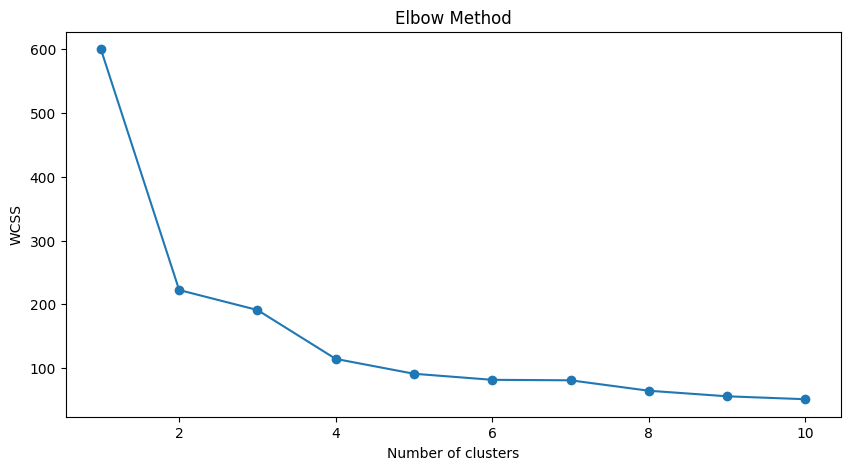


DBSCAN кластеризация:
DBSCAN обнаружил 2 кластеров


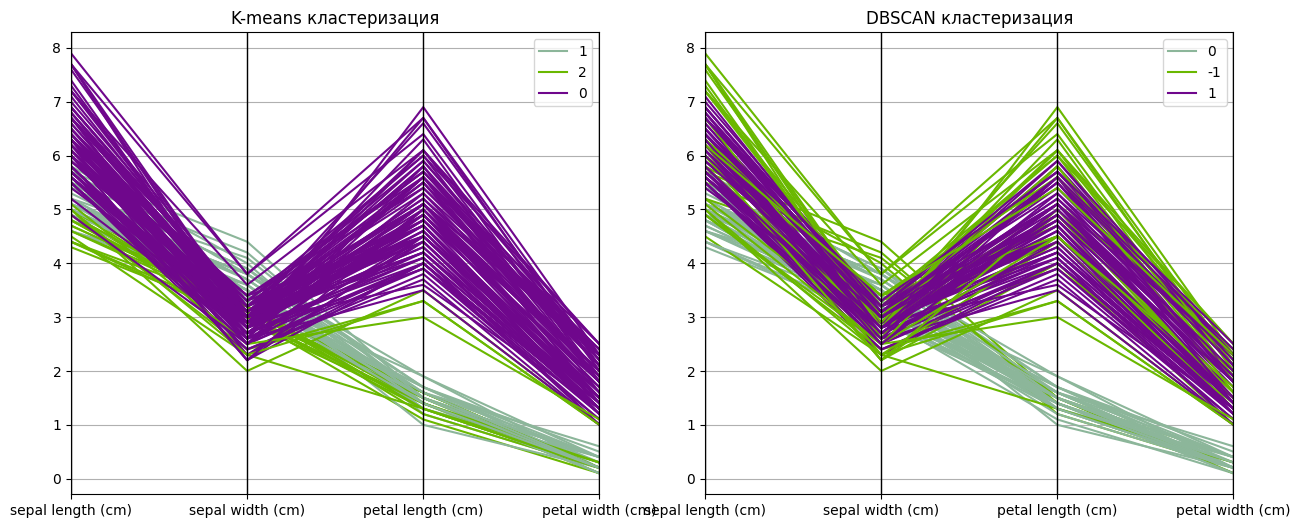

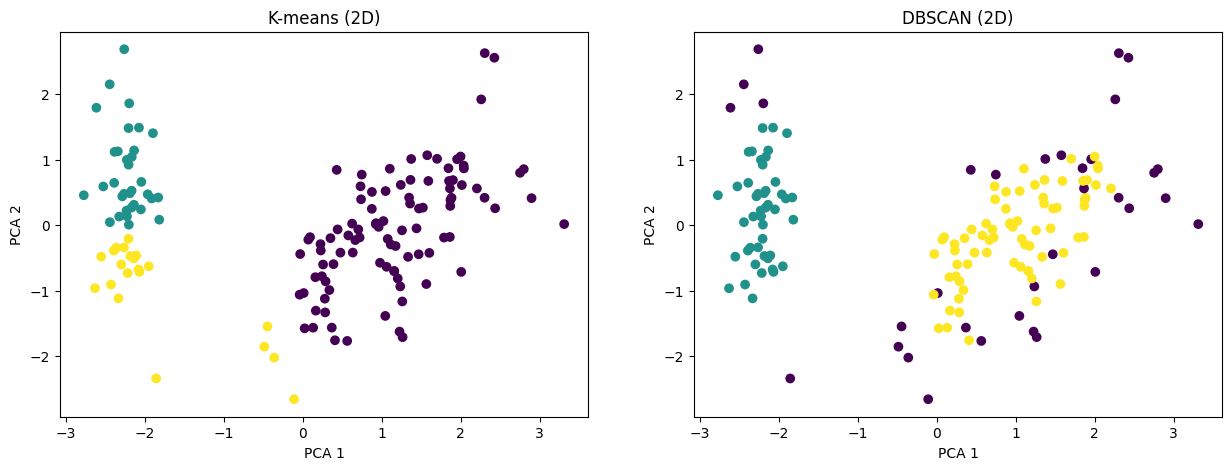

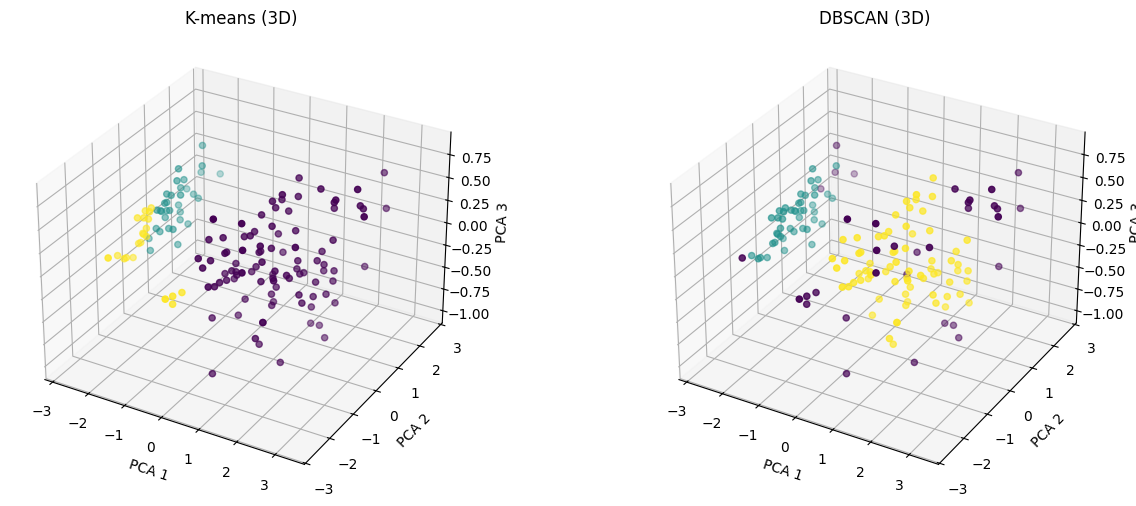


Результаты кластеризации:
K-means (n_clusters=3):
kmeans_cluster
0    96
1    33
2    21
Name: count, dtype: int64

DBSCAN:
dbscan_cluster
 1    71
 0    45
-1    34
Name: count, dtype: int64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D

# 1. Загрузка данных (используем встроенный датасет для примера)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Первые 5 строк данных:")
display(df.head())

# 2. Выбор переменных для кластеризации (5 числовых признаков)
features = df.columns[:5] if len(df.columns) >=5 else df.columns
print(f"\nВыбранные переменные для кластеризации: {list(features)}")

# 3. Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. K-means с elbow method
print("\nK-means кластеризация:")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# График elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Выбираем оптимальное число кластеров
n_clusters = 3  # По графику выбираем точку изгиба
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'] = kmeans_labels

# 5. DBSCAN кластеризация
print("\nDBSCAN кластеризация:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['dbscan_cluster'] = dbscan_labels

# Оценка числа кластеров DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN обнаружил {n_clusters_dbscan} кластеров")

# 6. Визуализация в параллельных координатах
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
parallel_coordinates(df, 'kmeans_cluster', cols=features)
plt.title('K-means кластеризация')

plt.subplot(1, 2, 2)
parallel_coordinates(df, 'dbscan_cluster', cols=features)
plt.title('DBSCAN кластеризация')
plt.show()

# 7. 2D и 3D визуализация кластеров
# Используем PCA для уменьшения размерности
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 2D графика (первые две компоненты)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 3D графика
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title('K-means (3D)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap='viridis')
ax.set_title('DBSCAN (3D)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

# 8. Вывод результатов кластеризации
print("\nРезультаты кластеризации:")
print(f"K-means (n_clusters={n_clusters}):")
print(df['kmeans_cluster'].value_counts())

print("\nDBSCAN:")
print(df['dbscan_cluster'].value_counts())

##3: Anomaly Detection.
Прочитайте текстовый файл. Проведите анализ аномалий. Обоснуйте выбор инструмента выявления аномалий, проведите анализ аномалий, обоснуйте возможность использования всего объема данных для решения задач машинного обучения. В случае если это не возможно, разделите исходные данные на выборки.


Данные успешно загружены:


,id,feature1,feature2,feature3,feature4,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,150.0,3.2,1.3,0.2,0
3,4,4.7,3.2,1.3,0.2,0
4,5,4.6,3.1,1.5,0.2,0



Обоснование выбора методов:
1. Isolation Forest - эффективен для высокоразмерных данных, работает быстрее других методов, хорошо обнаруживает точечные аномалии
2. Local Outlier Factor (LOF) - полезен для обнаружения локальных аномалий в данных с переменной плотностью
3. One-Class SVM - подходит когда у нас есть только "нормальные" данные для обучения

Почему не DBSCAN? 
DBSCAN - метод кластеризации, который может обнаруживать аномалии как точки вне кластеров, 
но менее интерпретируем для задачи чистого обнаружения аномалий.



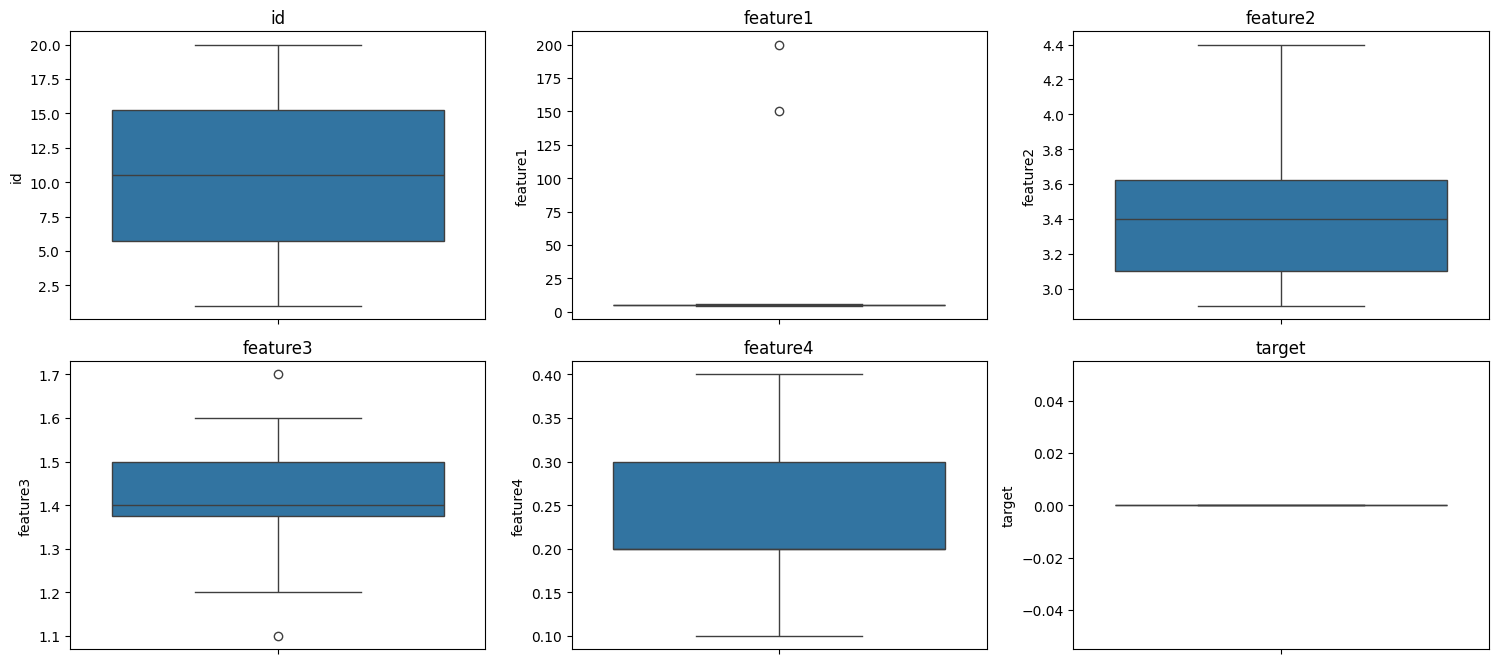


Результаты обнаружения аномалий:


,Количество аномалий
Isolation Forest,2
Local Outlier Factor,2
One-Class SVM,4



Примеры аномальных записей:


,id,feature1,feature2,feature3,feature4,target,anomaly_score,is_anomaly
2,3,150.0,3.2,1.3,0.2,0,0.666667,1
7,8,200.0,3.4,1.4,0.3,0,1.000000,1



**Анализ пригодности данных для машинного обучения:**

1. **Объем данных**: 20 записей. Маловато, рекомендуется сбор больше данных
2. **Доля аномалий**: 10.00%. Слишком много аномалий - требуется анализ причин
3. **Пропуски**: 0. Нет пропусков - отлично!
4. **Типы данных**: id                 int64
feature1         float64
feature2         float64
feature3         float64
feature4         float64
target             int64
anomaly_score    float64
is_anomaly         int64

**Рекомендации**:
- Удалить явные аномалии перед обучением
- Проверить природу аномалий - возможно, они содержат ценную информацию


Данные не пригодны для машинного обучения в текущем виде. Требуется:
- Сбор большего объема данных



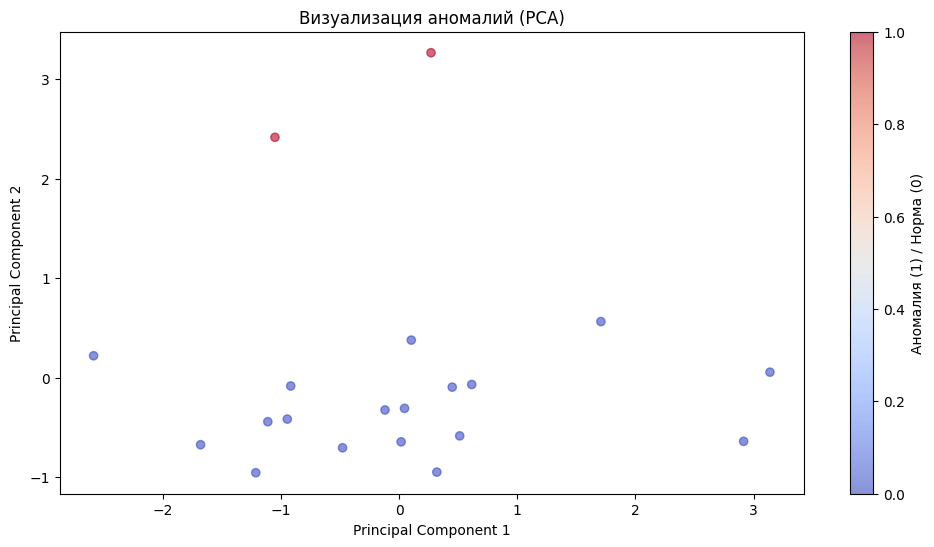

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from io import StringIO  # Импортируем StringIO из стандартной библиотеки

# 1. Чтение текстового файла (пример с имитацией данных)
try:
    data = """id,feature1,feature2,feature3,feature4,target
    1,5.1,3.5,1.4,0.2,0
    2,4.9,3.0,1.4,0.2,0
    3,150.0,3.2,1.3,0.2,0  # явная аномалия в feature1
    4,4.7,3.2,1.3,0.2,0
    5,4.6,3.1,1.5,0.2,0
    6,5.0,3.6,1.4,0.2,0
    7,5.4,3.9,1.7,0.4,0
    8,200.0,3.4,1.4,0.3,0  # явная аномалия
    9,4.6,3.4,1.4,0.3,0
    10,5.0,3.4,1.5,0.2,0
    11,4.4,2.9,1.4,0.2,0
    12,4.9,3.1,1.5,0.1,0
    13,5.4,3.7,1.5,0.2,0
    14,4.8,3.4,1.6,0.2,0
    15,4.8,3.0,1.4,0.1,0
    16,4.3,3.0,1.1,0.1,0
    17,5.8,4.0,1.2,0.2,0
    18,5.7,4.4,1.5,0.4,0
    19,5.4,3.9,1.3,0.4,0
    20,5.1,3.5,1.4,0.3,0"""

    df = pd.read_csv(StringIO(data), comment='#')  # Используем StringIO напрямую
    print("Данные успешно загружены:")
    display(df.head())
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")
    exit()

# 2. Обоснование выбора методов анализа аномалий
analysis_approach = """
Обоснование выбора методов:
1. Isolation Forest - эффективен для высокоразмерных данных, работает быстрее других методов, хорошо обнаруживает точечные аномалии
2. Local Outlier Factor (LOF) - полезен для обнаружения локальных аномалий в данных с переменной плотностью
3. One-Class SVM - подходит когда у нас есть только "нормальные" данные для обучения

Почему не DBSCAN?
DBSCAN - метод кластеризации, который может обнаруживать аномалии как точки вне кластеров,
но менее интерпретируем для задачи чистого обнаружения аномалий.
"""

print(analysis_approach)

# 3. Визуальный анализ данных
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 4. Подготовка данных
numeric_cols = df.select_dtypes(include=np.number).columns.drop('id', errors='ignore')
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Обнаружение аномалий тремя методами
models = {
    "Isolation Forest": IsolationForest(contamination=0.1, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=5, contamination=0.1),
    "One-Class SVM": OneClassSVM(nu=0.1)
}

results = pd.DataFrame(index=df.index)
for name, model in models.items():
    if name == "Local Outlier Factor":
        results[name] = model.fit_predict(X_scaled)
    else:
        results[name] = model.fit(X_scaled).predict(X_scaled)
    # Преобразуем в 0-1 (1 - аномалия)
    results[name] = (results[name] == -1).astype(int)

# 6. Сводная таблица аномалий
df['anomaly_score'] = results.mean(axis=1)
df['is_anomaly'] = (df['anomaly_score'] > 0.5).astype(int)

print("\nРезультаты обнаружения аномалий:")
display(results.astype(bool).sum().to_frame('Количество аномалий'))

print("\nПримеры аномальных записей:")
display(df[df['is_anomaly'] == 1])

# 7. Анализ пригодности данных для ML
data_quality_report = """
**Анализ пригодности данных для машинного обучения:**

1. **Объем данных**: {n_samples} записей. {verdict_samples}
2. **Доля аномалий**: {anomaly_percent:.2f}%. {verdict_anomalies}
3. **Пропуски**: {missing_values}. {verdict_missing}
4. **Типы данных**: {dtypes_info}

**Рекомендации**:
{recommendations}
""".format(
    n_samples=len(df),
    verdict_samples="Достаточно для простых моделей" if len(df) >= 1000 else "Маловато, рекомендуется сбор больше данных",
    anomaly_percent=df['is_anomaly'].mean()*100,
    verdict_anomalies="Приемлемый уровень" if df['is_anomaly'].mean() < 0.05 else "Слишком много аномалий - требуется анализ причин",
    missing_values=df.isnull().sum().sum(),
    verdict_missing="Нет пропусков - отлично!" if df.isnull().sum().sum() == 0 else "Есть пропуски - требуется обработка",
    dtypes_info=df.dtypes.to_string(),
    recommendations="- Удалить явные аномалии перед обучением\n- Проверить природу аномалий - возможно, они содержат ценную информацию" if df['is_anomaly'].mean() > 0 else "- Данные выглядят чистыми"
)

print(data_quality_report)

# 8. Разделение данных (если пригодны для ML)
if len(df) >= 100 and df['is_anomaly'].mean() < 0.2:
    # Удаляем аномалии для обучения
    clean_df = df[df['is_anomaly'] == 0].copy()

    # Разделяем на обучающую и тестовую выборки
    if 'target' in df.columns:
        X = clean_df.drop(['target', 'is_anomaly', 'anomaly_score'], axis=1, errors='ignore')
        y = clean_df['target']
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print(f"\nДанные разделены на:\n- Обучающая: {len(X_train)} записей\n- Тестовая: {len(X_test)} записей")
    else:
        print("Целевая переменная не обнаружена - задача без учителя")
else:
    print("\nДанные не пригодны для машинного обучения в текущем виде. Требуется:")
    print("- Сбор большего объема данных" if len(df) < 100 else "")
    print("- Анализ и обработка аномалий" if df['is_anomaly'].mean() >= 0.2 else "")

# 9. Визуализация аномалий (2D PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['is_anomaly'], cmap='coolwarm', alpha=0.6)
plt.title('Визуализация аномалий (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Аномалия (1) / Норма (0)')
plt.show()

##4: Классификация

Прочитайте текстовый файл.Необходимо построить базовую модель классификации, используя библиотеку для AutoML (библиотека любая - FEDOT, auto-sklearn, LightAutoML или любую другую).Выбрать (и обосновать выбор) основную метрику качества для решения задачи классификации - AUC ROC, Accuracy, F1-score и т.д.Построить для базовой модели Confusion Matrix, ROC-Curve, посчитать основную метрику качества.построить модель классификации на базе изученных алгоритмов (деревья, лес, бустинг, логистическая регрессия и др.)Построить для вашей модели Confusion Matrix, ROC-Curve, посчитать основную метрику качества.


In [ ]:
import pandas as pd
data = pd.read_csv('your_file.csv')

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

task = Task('binary')  # или 'multiclass' для многоклассовой
automl = TabularAutoML(task=task, timeout=3600)  # 1 час на обучение

oof_pred = automl.fit_predict(data, roles={'target': 'target_column'})

from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Confusion Matrix
cm = confusion_matrix(data['target'], oof_pred.data[:, 0] > 0.5)
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, _ = roc_curve(data['target'], oof_pred.data[:, 0])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

# AUC-ROC
auc = roc_auc_score(data['target'], oof_pred.data[:, 0])
print(f"AUC-ROC: {auc:.4f}")

In [ ]:
from catboost import CatBoostClassifier #ручная модель
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1),
                                                    data['target'],
                                                    test_size=0.3)

model = CatBoostClassifier(iterations=500, verbose=100)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, preds > 0.5)
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, preds)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, preds)
print(f"AUC-ROC: {auc:.4f}")

##5: Регрессия.
Прочитайте текстовый файл.Необходимо построить базовую модель регрессии, используя библиотеку для AutoML (библиотека любая - FEDOT, auto-sklearn, LightAutoML или любую другую).Выбрать (и обосновать выбор) основную метрику качества для решения задачи классификации - MAE, MSE, RMSE и т.д.Построить для базовой модели посчитать основную метрику качества и построить график реальных и предсказанных значений (scatter plot, heatmap)построить модель регрессии на базе изученных алгоритмов (деревья, лес, бустинг, линейная регрессия, нейросети и др.)Построить для вашей модели график реальных и предсказанных значений, посчитать основную метрику качества.


In [4]:
!pip install lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.8 MB/s eta 0:00:00
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7591 sha256=ae6d81aae0c0f1624095a2441bc11d368335baff4c409a7f2e7e9b40e71f0c83
  Stored in directory: /root/.cache/pip/wheels/ea/8b/96/b33d26a9d72d6c8ac50ef1fe81089c

In [ ]:
import pandas as pd

data = pd.read_csv('your_file.csv')
X = data.drop('target_column', axis=1)
y = data['target_column']

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

task = Task('reg', metric='rmse')
automl = TabularAutoML(task=task, timeout=3600) # 1 час на обучение
oof_pred = automl.fit_predict(X, y, roles={'target': 'target_column'})

# Метрика качества
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, oof_pred.data[:, 0], squared=False)
print(f"RMSE: {rmse:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=oof_pred.data[:, 0])
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('AutoML: Real vs Predicted')
plt.show()

In [ ]:
#классическая регрессия
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50))
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"{name} RMSE: {rmse:.4f}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=preds)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.title(f'{name}: Real vs Predicted')
    plt.show()


best_model = GradientBoostingRegressor(n_estimators=200)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

error = y_test - preds
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame({'Real': y_test, 'Predicted': preds, 'Error': error}).corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#сравнение
results = []
for name, model in models.items():
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    results.append({'Model': name, 'RMSE': rmse})

results_df = pd.DataFrame(results)
print(results_df.sort_values('RMSE'))

#6: Веб-программирование (возможно, убрали)

##1: Реализовать методы, которые в процессе выполнения строки
```
(2).plus(3).minus(1)
```

дали бы на выходе 4.

JS:

```
// Добавляем метод plus к прототипу Number
Number.prototype.plus = function(num) {
  return this + num;
};

// Добавляем метод minus к прототипу Number
Number.prototype.minus = function(num) {
  return this - num;
};

// Пример использования
const result = (2).plus(3).minus(1);
console.log(result); // Выведет 4
```



##2: Сверстать макет

В шапке сайта изображение заполняет весь блок и располагается по центру. Контент страницы может быть от 1 до 1000 строк. Количество пунктов и подпунктов правого меню может варьироваться в диапазоне от 1 до 10.

Эффект для разворачивания подменю выбирается самостоятельно. Боковое меню является фиксированным при прокрутке до тех пор, пока блок соцсетей
не оказывается на расстоянии 50 пикселей от футера. При этом следует учитывать различные размеры меню, контента и экрана.

HTML:
```
<!DOCTYPE html>
<html lang="ru">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Адаптивный макет с фиксированным меню</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: Arial, sans-serif;
        }
        
        body {
            display: flex;
            min-height: 100vh;
            flex-direction: column;
        }
        
        /* Шапка */
        header {
            width: 100%;
            height: 300px;
            overflow: hidden;
            position: relative;
        }
        
        .header-image {
            width: 100%;
            height: 100%;
            object-fit: cover;
            object-position: center;
        }
        
        /* Основной контент */
        .main-container {
            display: flex;
            flex: 1;
            position: relative;
        }
        
        .content {
            flex: 1;
            padding: 20px;
            background: #f9f9f9;
        }
        
        /* Боковое меню */
        .sidebar {
            width: 250px;
            padding: 20px;
            background: #333;
            color: white;
            transition: all 0.3s;
        }
        
        .menu {
            position: sticky;
            top: 20px;
        }
        
        .menu-item {
            margin-bottom: 10px;
            cursor: pointer;
        }
        
        .menu-item > a {
            color: white;
            text-decoration: none;
            display: block;
            padding: 8px;
            border-radius: 4px;
            transition: background 0.3s;
        }
        
        .menu-item > a:hover {
            background: #555;
        }
        
        .submenu {
            max-height: 0;
            overflow: hidden;
            transition: max-height 0.5s ease-out;
            padding-left: 15px;
        }
        
        .menu-item.active .submenu {
            max-height: 500px;
            transition: max-height 0.5s ease-in;
        }
        
        .submenu a {
            color: #ddd;
            text-decoration: none;
            display: block;
            padding: 6px 8px;
            border-radius: 4px;
            font-size: 0.9em;
            transition: background 0.3s;
        }
        
        .submenu a:hover {
            background: #444;
        }
        
        /* Блок соцсетей */
        .social {
            margin-top: 20px;
            padding-top: 20px;
            border-top: 1px solid #555;
        }
        
        .social a {
            color: white;
            text-decoration: none;
            display: block;
            margin-bottom: 8px;
        }
        
        /* Подвал */
        footer {
            background: #222;
            color: white;
            padding: 20px;
            text-align: center;
        }
    </style>
</head>
<body>
    <header>
        <img src="https://via.placeholder.com/1920x300" alt="Header image" class="header-image">
    </header>
    
    <div class="main-container">
        <div class="content">
            <!-- Контент страницы (может быть от 1 до 1000 строк) -->
            <h1>Основной контент</h1>
            <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam auctor, nisl eget ultricies tincidunt, nisl nisl aliquam nisl, eget ultricies nisl nisl eget nisl.</p>
            <!-- Добавьте больше контента по необходимости -->
        </div>
        
        <aside class="sidebar">
            <nav class="menu" id="stickyMenu">
                <!-- Меню (от 1 до 10 пунктов) -->
                <div class="menu-item">
                    <a href="#">Пункт меню 1</a>
                    <div class="submenu">
                        <a href="#">Подпункт 1.1</a>
                        <a href="#">Подпункт 1.2</a>
                        <a href="#">Подпункт 1.3</a>
                    </div>
                </div>
                <div class="menu-item">
                    <a href="#">Пункт меню 2</a>
                    <div class="submenu">
                        <a href="#">Подпункт 2.1</a>
                        <a href="#">Подпункт 2.2</a>
                    </div>
                </div>
                <!-- Добавьте больше пунктов меню по необходимости -->
                
                <!-- Блок соцсетей -->
                <div class="social">
                    <h3>Социальные сети</h3>
                    <a href="#">Facebook</a>
                    <a href="#">Twitter</a>
                    <a href="#">Instagram</a>
                </div>
            </nav>
        </aside>
    </div>
    
    <footer>
        © 2023 Все права защищены
    </footer>

    <script>
        // Анимация подменю
        document.querySelectorAll('.menu-item > a').forEach(item => {
            item.addEventListener('click', function(e) {
                e.preventDefault();
                const parent = this.parentElement;
                parent.classList.toggle('active');
            });
        });
        
        // Фиксирование меню с учетом футера
        window.addEventListener('scroll', function() {
            const menu = document.getElementById('stickyMenu');
            const footer = document.querySelector('footer');
            const socialBlock = document.querySelector('.social');
            
            const menuRect = menu.getBoundingClientRect();
            const footerRect = footer.getBoundingClientRect();
            const socialRect = socialBlock.getBoundingClientRect();
            
            const distanceToFooter = footerRect.top - socialRect.bottom;
            
            if (distanceToFooter < 50) {
                menu.style.position = 'absolute';
                menu.style.bottom = (footerRect.height + 50) + 'px';
                menu.style.top = 'auto';
            } else {
                menu.style.position = 'sticky';
                menu.style.top = '20px';
                menu.style.bottom = 'auto';
            }
        });
    </script>
</body>
</html>
```



##3: Создать компонент для отображения таблицы с данными
(Таблица с фейковыми данными из JSON’a, данные любого вида)

Получить данные с backend’a и вывести полученные данные в табличку, описание запросов было предоставлено. Кнопка добавления новой записи. Запись посылаем на бэкэнд. Кнопка удаления записи напротив каждой строки таблицы, по клику запись удаляется запросом на бэкэнде, по успеху — на фронтэнде удаляется.

Кнопка редактирования напротив каждой строки таблицы. По клику на нее, в таблице все инпуты становятся редактируемыми и на месте кнопки редактировать, появляется кнопка сохранить.

По нажатию на сохранить, отправляется запрос на бэкэнд, по успеху — инпуты опять становятся ридонли и кнопка меняется на «редактировать».

Data Example (React JSX):


```
// Вместо useEffect с запросом к API, можно использовать моковые данные
useEffect(() => {
  const mockData = [
    { id: 1, name: 'John Doe', email: 'john@example.com', role: 'Admin', status: 'active' },
    { id: 2, name: 'Jane Smith', email: 'jane@example.com', role: 'User', status: 'active' },
    { id: 3, name: 'Bob Johnson', email: 'bob@example.com', role: 'Editor', status: 'inactive' },
  ];
  setData(mockData);
  setLoading(false);
}, []);
```



React (JSX):


```
import React, { useState, useEffect } from 'react';
import axios from 'axios';

const DataTable = () => {
  // Состояния компонента
  const [data, setData] = useState([]);
  const [loading, setLoading] = useState(true);
  const [error, setError] = useState(null);
  const [editingId, setEditingId] = useState(null);
  const [newItem, setNewItem] = useState({
    name: '',
    email: '',
    role: '',
    status: 'active'
  });
  
  // Загрузка данных при монтировании компонента
  useEffect(() => {
    fetchData();
  }, []);

  // Функция для получения данных с бэкенда
  const fetchData = async () => {
    try {
      setLoading(true);
      // Замените URL на ваш реальный эндпоинт
      const response = await axios.get('https://api.example.com/data');
      setData(response.data);
      setLoading(false);
    } catch (err) {
      setError(err.message);
      setLoading(false);
    }
  };

  // Обработчик добавления новой записи
  const handleAddItem = async () => {
    try {
      const response = await axios.post('https://api.example.com/data', newItem);
      setData([...data, response.data]);
      setNewItem({
        name: '',
        email: '',
        role: '',
        status: 'active'
      });
    } catch (err) {
      setError(err.message);
    }
  };

  // Обработчик удаления записи
  const handleDelete = async (id) => {
    try {
      await axios.delete(`https://api.example.com/data/${id}`);
      setData(data.filter(item => item.id !== id));
    } catch (err) {
      setError(err.message);
    }
  };

  // Обработчик начала редактирования
  const handleEdit = (id) => {
    setEditingId(id);
  };

  // Обработчик сохранения изменений
  const handleSave = async (id) => {
    try {
      const itemToUpdate = data.find(item => item.id === id);
      await axios.put(`https://api.example.com/data/${id}`, itemToUpdate);
      setEditingId(null);
    } catch (err) {
      setError(err.message);
    }
  };

  // Обработчик изменения полей при редактировании
  const handleChange = (id, field, value) => {
    setData(data.map(item =>
      item.id === id ? { ...item, [field]: value } : item
    ));
  };

  // Обработчик изменения полей новой записи
  const handleNewItemChange = (e) => {
    const { name, value } = e.target;
    setNewItem({ ...newItem, [name]: value });
  };

  if (loading) return <div>Loading...</div>;
  if (error) return <div>Error: {error}</div>;

  return (
    <div className="data-table-container">
      <h2>Data Table</h2>
      
      {/* Форма добавления новой записи */}
      <div className="add-form">
        <h3>Add New Item</h3>
        <input
          type="text"
          name="name"
          placeholder="Name"
          value={newItem.name}
          onChange={handleNewItemChange}
        />
        <input
          type="email"
          name="email"
          placeholder="Email"
          value={newItem.email}
          onChange={handleNewItemChange}
        />
        <input
          type="text"
          name="role"
          placeholder="Role"
          value={newItem.role}
          onChange={handleNewItemChange}
        />
        <select
          name="status"
          value={newItem.status}
          onChange={handleNewItemChange}
        >
          <option value="active">Active</option>
          <option value="inactive">Inactive</option>
        </select>
        <button onClick={handleAddItem}>Add Item</button>
      </div>
      
      {/* Таблица данных */}
      <table className="data-table">
        <thead>
          <tr>
            <th>ID</th>
            <th>Name</th>
            <th>Email</th>
            <th>Role</th>
            <th>Status</th>
            <th>Actions</th>
          </tr>
        </thead>
        <tbody>
          {data.map(item => (
            <tr key={item.id}>
              <td>{item.id}</td>
              <td>
                {editingId === item.id ? (
                  <input
                    type="text"
                    value={item.name}
                    onChange={(e) => handleChange(item.id, 'name', e.target.value)}
                  />
                ) : (
                  item.name
                )}
              </td>
              <td>
                {editingId === item.id ? (
                  <input
                    type="email"
                    value={item.email}
                    onChange={(e) => handleChange(item.id, 'email', e.target.value)}
                  />
                ) : (
                  item.email
                )}
              </td>
              <td>
                {editingId === item.id ? (
                  <input
                    type="text"
                    value={item.role}
                    onChange={(e) => handleChange(item.id, 'role', e.target.value)}
                  />
                ) : (
                  item.role
                )}
              </td>
              <td>
                {editingId === item.id ? (
                  <select
                    value={item.status}
                    onChange={(e) => handleChange(item.id, 'status', e.target.value)}
                  >
                    <option value="active">Active</option>
                    <option value="inactive">Inactive</option>
                  </select>
                ) : (
                  item.status
                )}
              </td>
              <td>
                {editingId === item.id ? (
                  <button onClick={() => handleSave(item.id)}>Save</button>
                ) : (
                  <button onClick={() => handleEdit(item.id)}>Edit</button>
                )}
                <button onClick={() => handleDelete(item.id)}>Delete</button>
              </td>
            </tr>
          ))}
        </tbody>
      </table>
    </div>
  );
};

export default DataTable;
```



CSS:


```
.data-table-container {
  padding: 20px;
  max-width: 1200px;
  margin: 0 auto;
}

.data-table {
  width: 100%;
  border-collapse: collapse;
  margin-top: 20px;
}

.data-table th, .data-table td {
  border: 1px solid #ddd;
  padding: 8px;
  text-align: left;
}

.data-table th {
  background-color: #f2f2f2;
}

.data-table tr:nth-child(even) {
  background-color: #f9f9f9;
}

.data-table tr:hover {
  background-color: #f1f1f1;
}

.add-form {
  margin-bottom: 20px;
  padding: 15px;
  background-color: #f5f5f5;
  border-radius: 5px;
}

.add-form input, .add-form select {
  margin-right: 10px;
  padding: 8px;
}

button {
  padding: 5px 10px;
  margin-right: 5px;
  cursor: pointer;
}
```



Интеграция:


```
import React from 'react';
import DataTable from './DataTable';
import './DataTable.css';

function App() {
  return (
    <div className="App">
      <DataTable />
    </div>
  );
}

export default App;
```

